In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
%matplotlib notebook

#load in the data
original_train = pd.read_csv('train.csv')
#view the first 10 rows of the data
original_train.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [2]:
#suppress warnings for presentation purposes
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Per Capita Crime Relating to Median Home Value')

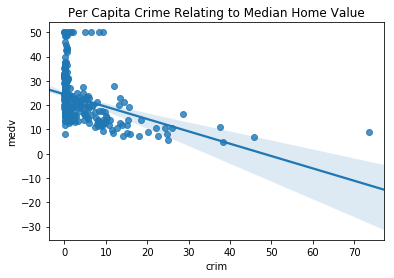

In [3]:
#quick scatter plot of per capita crime and median home value
sns.regplot(x='crim', y='medv', data=original_train).set_title('Per Capita Crime Relating to Median Home Value')

In [4]:
#describing the per capita crime column
original_train['crim'].describe()

count    333.000000
mean       3.360341
std        7.352272
min        0.006320
25%        0.078960
50%        0.261690
75%        3.678220
max       73.534100
Name: crim, dtype: float64

In [5]:
#check the rows where the per capita crime is greater than 30
original_train.loc[original_train['crim'] > 30]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
261,399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
268,415,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
271,419,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
275,428,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9


In [6]:
# Calculate first and third quartile
first_quart = original_train['crim'].describe()['25%']
third_quart = original_train['crim'].describe()['75%']

#Make a copy of the original dataset for working with the crim column
crim_train = original_train.copy()

# Remove outliers
crim_train['new_crim'] = [np.nan if (x < 1.5 * first_quart or x > 1.5 * third_quart) 
                              else x for x in original_train['crim']]
#count the total number of values that are not np.nan
print(crim_train['new_crim'].count())
#view the first 10 rows of the data
crim_train.head(10)

155


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,new_crim
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,NaN
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,0.22489
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9,NaN
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7,NaN
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4,0.62976
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2,0.63796


Text(0.5, 1.0, 'Per Capita Crime Without Outliers Relating to Median Home Value')

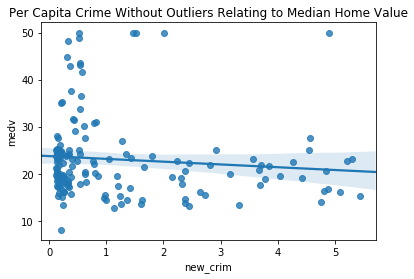

In [7]:
#quick scatter plot of per capita crime (without outliers) and median home value
sns.regplot(x='new_crim', y='medv', dropna = 'True',
            data=crim_train).set_title('Per Capita Crime Without Outliers Relating to Median Home Value')

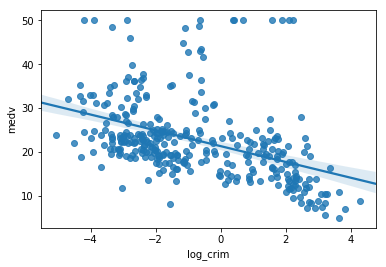

In [8]:
#quick scatter plot of logged per capita crime (without outliers) and median home value
crim_train['log_crim'] = np.log(original_train['crim'])
sns.regplot(x = 'log_crim', y = 'medv', data = crim_train)

In [9]:
#check the t-test for 'crim' column
#shows the 'crim' column is statistically significant
stats.ttest_ind(crim_train['crim'],crim_train['medv'])

Ttest_indResult(statistic=-30.12625971520268, pvalue=2.4236539237439126e-126)

In [10]:
#check the t-test for 'log_crim' column
#shows the ' log_crim' column is statistically significant
stats.ttest_ind(crim_train['log_crim'],crim_train['medv'])

Ttest_indResult(statistic=-45.60341240667965, pvalue=9.642928604276975e-207)

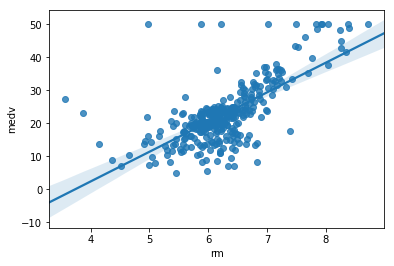

In [11]:
#quick scatter plot of rooms per dwelling and median home value
#looks like a somewhat positive linear correlation
sns.regplot(x = 'rm', y = 'medv', data = original_train)

In [12]:
#checking the pairwise correlation of all columns in the crim_train dataframe
crim_train.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,new_crim,log_crim
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694,0.502439,0.540376
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454,1.000000,0.693306
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842,-0.261228,-0.520337
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932,0.543125,0.710929
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390,0.056383,0.040113
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054,0.622065,0.785796
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598,-0.179500,-0.364113
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888,0.332986,0.646675
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422,-0.395343,-0.673831
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251,0.837936,0.848591


In [13]:
#dropping the ID and new_crim columns from crim_train dataframe
crim_train.drop(['ID','new_crim'], axis = 1, inplace = True)
crim_train.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,log_crim
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-5.064036
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-3.600502
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-3.430523
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,-2.672924
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,-2.427128
5,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,-1.492144
6,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9,-2.141572
7,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7,-2.366804
8,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4,-0.462416
9,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2,-0.449480


In [14]:
#look at ordinary least squares regression on crim_train dataframe
#crim, indus, age columns not statistically significant
orig_ols = smf.ols('medv ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + crim + lstat', 
              data= original_train).fit()
print(orig_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     67.41
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           2.89e-83
Time:                        15:17:38   Log-Likelihood:                -990.09
No. Observations:                 333   AIC:                             2008.
Df Residuals:                     319   BIC:                             2061.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.0454      6.296      5.407      0.0

In [16]:
#create two new columns that log existing indus and age columns
crim_train['log_indus'] = np.log(original_train['indus'])
crim_train['log_age'] = np.log(original_train['age'])

In [17]:
#look at ordinary least squares regression on dataframe with log_indus, log_age, log_crim instead of 
#original indus, age, crim columns
log_only_ols = smf.ols('medv ~ zn  + chas + nox + rm + dis + rad + tax + ptratio + black  + lstat + log_crim + log_indus + log_age', 
              data= crim_train).fit()
print(log_only_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     68.98
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           2.01e-84
Time:                        15:19:19   Log-Likelihood:                -987.27
No. Observations:                 333   AIC:                             2003.
Df Residuals:                     319   BIC:                             2056.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.0591      6.511      5.846      0.0

In [18]:
#look at ordinary least squares regression on crim_train dataframe along with log_indus, log_age, log_crim
all_logs_ols = smf.ols('medv ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + crim + lstat + log_crim + log_indus + log_age', 
              data= crim_train).fit()
print(all_logs_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     60.70
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           3.49e-86
Time:                        15:20:35   Log-Likelihood:                -976.20
No. Observations:                 333   AIC:                             1986.
Df Residuals:                     316   BIC:                             2051.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.4053      8.005      6.547      0.0

In [19]:
#checking the pairwise correlation of all columns in the crim_train dataframe for multicollinearity issues
crim_train.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,log_crim,log_indus,log_age
crim,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454,0.693306,0.405670,0.310508
zn,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842,-0.520337,-0.637368,-0.486100
indus,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932,0.710929,0.947065,0.521660
chas,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390,0.040113,0.045178,0.076121
nox,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054,0.785796,0.719326,0.645087
rm,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598,-0.364113,-0.471545,-0.205688
age,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888,0.646675,0.613418,0.948125
dis,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422,-0.673831,-0.712578,-0.686564
rad,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251,0.848591,0.566414,0.384704
tax,0.617081,-0.311180,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,1.000000,0.467437,-0.406477,0.544485,-0.448078,0.816731,0.668348,0.428866


In [20]:
#F-test for age and log_age column
#P-value shows the two columns shouldn't be included
print(all_logs_ols.f_test('age = log_age = 0'))

<F test: F=array([[1.41023435]]), p=0.24561794827736966, df_denom=316, df_num=2>


In [21]:
#F-test for indus and log_indus column
#P-value shows the two columns should be included
print(all_logs_ols.f_test('indus = log_indus = 0'))

<F test: F=array([[10.61766823]]), p=3.444555732619795e-05, df_denom=316, df_num=2>


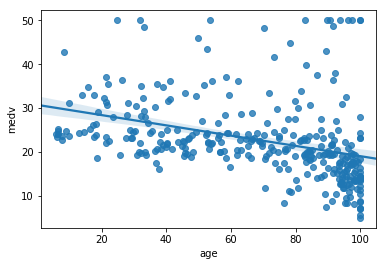

In [22]:
#quick scatter plot of age and median home value
sns.regplot(x = 'age', y = 'medv', data = original_train)

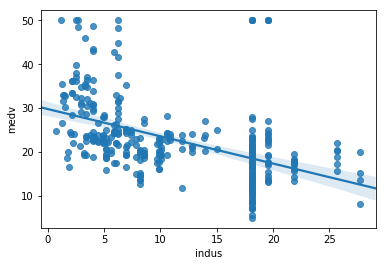

In [23]:
#quick scatter plot of indus and median home value
sns.regplot(x = 'indus', y = 'medv', data = original_train)

In [24]:
#look at ordinary least squares regression on crim_train dataframe along with log_crim
#age is not statistically significant
crim_log_ols = smf.ols('medv ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + crim + lstat + log_crim', 
              data= crim_train).fit()
print(crim_log_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     63.85
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           1.72e-83
Time:                        15:22:05   Log-Likelihood:                -987.28
No. Observations:                 333   AIC:                             2005.
Df Residuals:                     318   BIC:                             2062.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4914      6.341      5.755      0.0

In [25]:
original_train.head(15)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


# Linear Regression Algorithm With Original Data

In [27]:
#get the data into a train-test-split format
X_orig_train = original_train[['zn','chas','nox','rm', 'dis','rad','tax','ptratio','black','crim','lstat','indus','age']]
Y_orig_train = original_train.filter(['medv'], axis = 1)

#load in test data
original_test = pd.read_csv('test.csv')

X_orig_test = original_test[['zn','chas','nox','rm', 'dis','rad','tax','ptratio','black','crim','lstat','indus','age']]

#perform linear regression
orig_linreg = LinearRegression().fit(X_orig_train, Y_orig_train)

#73.3% of the variation in the independent variable is explained by the independent variable using linear regression
print('R-squared score (training): {:.3f}'
     .format(orig_linreg.score(X_orig_train, Y_orig_train)))

R-squared score (training): 0.733


In [28]:
#make predictions using the linear model 
orig_testreg = orig_linreg.predict(X_orig_test)

#create a Dataframe from a np.ndarray
orig_predict = pd.DataFrame({'medv': orig_testreg[:,0]})

#join the two dataframes to prep for submission
orig_final = pd.concat([original_test['ID'], orig_predict], axis=1)
orig_final.head()

,ID,medv
0,3,30.599594
1,6,25.100459
2,8,18.158993
3,9,9.303476
4,10,17.689729


In [29]:
#create csv from dataframe for Kaggle submission
orig_final.to_csv('BosHousSubOrigLinReg.csv', index = False)
#Score was 4.74115 (64 out of 75 on Public Leaderboard)

# Linear Regression With Logs

In [36]:
#look at the first five rows of crim_train dataframe with log_crim, log_indus, and log_age
crim_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,log_crim,log_indus,log_age
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-5.064036,0.837248,4.177459
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-3.600502,1.955860,4.368181
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-3.430523,0.779325,3.824284
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,-2.672924,0.779325,3.992681
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,-2.427128,2.063058,4.198705


In [37]:
#drop log_age because it was not statistically significant
X_log_train = crim_train.drop(['log_age','medv'], axis = 1)
Y_log_train = original_train.filter(['medv'], axis = 1)

#load in test data
log_test = pd.read_csv('test.csv')


log_test.drop(['ID'], axis = 1, inplace = True)
log_test['log_crim'] = np.log(log_test['crim'])
log_test['log_indus'] = np.log(log_test['indus'])

In [39]:
#fit the linear regression model
log_linreg = LinearRegression().fit(X_log_train, Y_log_train)

#75.4% of the variation in the independent variable is explained by the independent variable using linear regression
print('R-squared score (training): {:.3f}'
     .format(log_linreg.score(X_log_train, Y_log_train)))

#make predictions using the linear model
log_testreg = log_linreg.predict(log_test)

R-squared score (training): 0.754


In [40]:
#create a Dataframe from a np.ndarray
log_predict = pd.DataFrame({'medv': log_testreg[:,0]})
#join to make a final for submission
log_final = pd.concat([original_test['ID'], log_predict], axis=1)
log_final.head()

#Score was 4.60136 (59 out of 75 on Public Leaderboard)

,ID,medv
0,3,27.742413
1,6,27.140006
2,8,15.162070
3,9,6.662326
4,10,15.112482


In [41]:
#export to csv for Kaggle submission
log_final.to_csv('BosHousSubLogLinReg.csv', index = False)

# Polynomial Features Ridge Regression

In [42]:
#Transform original input data to add polynomial features up to degree 2
poly = PolynomialFeatures(degree=2)
X_pre_poly_train = original_train.drop(['ID','medv'], axis = 1)
X_pre_poly_test = original_test.drop(['ID'], axis = 1)

X_p_poly_train = poly.fit_transform(X_pre_poly_train)
Y_p_poly_train = original_train.filter(['medv'], axis = 1)

X_poly_test = poly.transform(X_pre_poly_test)

In [44]:
#split the training data into training and validation sets
X_poly_train, X_poly_val, Y_poly_train, Y_poly_val = train_test_split(X_p_poly_train, Y_p_poly_train,
                                                                     random_state = 0)

In [45]:
#The best r-squared training was 0.9389 and test was 0.8525 with an alpha of 25
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 5, 10, 20, 25, 30, 35, 40, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_poly_train, Y_poly_train)
    r2_train = linridge.score(X_poly_train, Y_poly_train)
    r2_test = linridge.score(X_poly_val, Y_poly_val)
    print('Alpha = {:.2f}\nr-squared training: {:.4f}, r-squared test: {:.4f}\n'
         .format(this_alpha, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
r-squared training: 0.9537, r-squared test: 0.7894

Alpha = 1.00
r-squared training: 0.9446, r-squared test: 0.8432

Alpha = 5.00
r-squared training: 0.9422, r-squared test: 0.8484

Alpha = 10.00
r-squared training: 0.9410, r-squared test: 0.8509

Alpha = 20.00
r-squared training: 0.9395, r-squared test: 0.8523

Alpha = 25.00
r-squared training: 0.9389, r-squared test: 0.8525

Alpha = 30.00
r-squared training: 0.9384, r-squared test: 0.8525

Alpha = 35.00
r-squared training: 0.9380, r-squared test: 0.8525

Alpha = 40.00
r-squared training: 0.9376, r-squared test: 0.8524

Alpha = 100.00
r-squared training: 0.9344, r-squared test: 0.8500

Alpha = 1000.00
r-squared training: 0.9241, r-squared test: 0.8410



0.8525397470436566
29


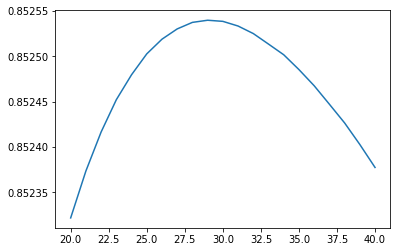

In [46]:
#RidgeCV is ridge regression with built-in cross-validation
#Looking at alpha values from 20-40, the best alpha was 29
from sklearn.linear_model import RidgeCV
alps = [20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
scores = []
for alp in alps:
    clf = RidgeCV(alphas = [alp]).fit(X_poly_train, Y_poly_train)
    scores.append(clf.score(X_poly_val, Y_poly_val))
plt.plot(alps,scores)
print(np.amax(scores))

xpos = scores.index(np.amax(scores))
xmax = alps[xpos]
print(xmax)

In [47]:
from sklearn.metrics.scorer import SCORERS

#look at different ways to score a model
print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


In [48]:
#fit the ridge regression model
poly_linreg = Ridge(alpha = 29).fit(X_poly_train, Y_poly_train)

#predict using the ridge regression model
poly_testreg = poly_linreg.predict(X_poly_test)

poly_testreg.shape

(173, 1)

In [49]:
#create a Dataframe from a np.ndarray
poly_predict = pd.DataFrame({'medv': poly_testreg[:,0]})
#join the two dataframe to prep for submission
poly_final = pd.concat([original_test['ID'], poly_predict], axis=1)
poly_final.head()

#Score was 4.14402 (51 out of 75 on Public Leaderboard)

,ID,medv
0,3,30.853890
1,6,26.956876
2,8,13.711604
3,9,19.194191
4,10,14.643181


In [50]:
#export to csv for Kaggle submission
poly_final.to_csv('BosHousSubPolyRidgeLinReg.csv', index = False)

# Polynomial Features Lasso Regression

In [51]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 15, 20, 25]:
    linlasso = Lasso(alpha, max_iter = 100000).fit(X_poly_train, Y_poly_train)
    r2_train = linlasso.score(X_poly_train, Y_poly_train)
    r2_test = linlasso.score(X_poly_val, Y_poly_val)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.4f}, \
r-squared test: {:.4f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 54, r-squared training: 0.9231, r-squared test: 0.8380

Alpha = 1.00
Features kept: 51, r-squared training: 0.9126, r-squared test: 0.8272

Alpha = 2.00
Features kept: 47, r-squared training: 0.9052, r-squared test: 0.8197

Alpha = 3.00
Features kept: 43, r-squared training: 0.8980, r-squared test: 0.8015

Alpha = 5.00
Features kept: 42, r-squared training: 0.8881, r-squared test: 0.8004

Alpha = 10.00
Features kept: 32, r-squared training: 0.8764, r-squared test: 0.8209

Alpha = 15.00
Features kept: 27, r-squared training: 0.8669, r-squared test: 0.8244

Alpha = 20.00
Features kept: 26, r-squared training: 0.8633, r-squared test: 0.8230

Alpha = 25.00
Features kept: 26, r-squared training: 0.8607, r-squared test: 0.8212



In [52]:
#fit the lasso regression model
poly_lasso_linreg = Lasso(alpha = 15, max_iter = 100000).fit(X_poly_train, Y_poly_train)

#predicting using lasso regression model
poly_lasso_testreg = poly_lasso_linreg.predict(X_poly_test)

poly_lasso_testreg = np.reshape(poly_lasso_testreg, (-1, 1))
poly_lasso_testreg.shape

(173, 1)

In [53]:
#create a Dataframe from a np.ndarray    
poly_lasso_predict = pd.DataFrame({'medv': poly_lasso_testreg[:,0]})
#join the two dataframes for make a final for submission
poly_lasso_final = pd.concat([original_test['ID'], poly_lasso_predict], axis=1)
poly_lasso_final.head()

,ID,medv
0,3,34.216794
1,6,27.649913
2,8,16.908987
3,9,16.260883
4,10,16.597426


In [54]:
#Export to csv for Kaggle submission
poly_lasso_final.to_csv('BosHousSubPolyLassoLinReg.csv', index = False)
#My score was 4.15097 (51 out of 75 on Public Leaderboard)